![](https://dcubeanalytics.com/wp-content/themes/divi-child/images/logo.svg)  
$$\text{D Cube Analytics Case Study }$$

********************************************
**Presented By - Surya Tripathi**

**Date - 16 May 2020**
*********************************************

# Problem Statement

One of the challenge for all Pharmaceutical companies is to understand the persistency  of drug as per the physician prescription. 

With an objective to gather insights on the factors that are impacting the persistency, build a classification for the given dataset. 

Target Variable: Persistency_Flag

Variable description is attached along with the data.


### Deliverables

Model Evaluation:
Following are the things we are expecting in the submission:
* R/Python code (executable) used for the analysis (with proper comments and readability). If it’s a Jupyter notebook with all the results in it, that will be best!
* Model diagnostics to be updated in the attached excel template (Excel File: Analysis Results)
* Final Analytical (processed) dataset used, which includes the additional derived variables and any other processing applied
* Attach a document along with brief description of following in the mail:
    * Changes done in the analytical dataset provided
    * Any other highlights about the process you followed to ensure a thorough evaluation


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
%matplotlib inline
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

## Data Read and Analysis

In [2]:
df = pd.read_excel("D3_CaseStudy.xlsx",sheet_name="Dataset")

In [3]:
df.shape

(3424, 69)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
Ptid                                                                  3424 non-null object
Persistency_Flag                                                      3424 non-null object
Gender                                                                3424 non-null object
Race                                                                  3424 non-null object
Ethnicity                                                             3424 non-null object
Region                                                                3424 non-null object
Age_Bucket                                                            3424 non-null object
Ntm_Speciality                                                        3424 non-null object
Ntm_Specialist_Flag                                                   3424 non-null object
Ntm_Speciality_Bucket                                                 3424

In [5]:
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [6]:
#column Value claenup
for i in df.columns:
    if df[i].dtype!='int64':
        df[i] = [c.replace('/', '_') for c in df[i]]
        df[i] = [c.replace(' ', '_') for c in df[i]]
        df[i] = [c.replace('-', '_') for c in df[i]]
        #df[i] = [c.replace('>', '_') for c in df[i]]
        #df[i] = [c.replace('<', '_') for c in df[i]]

In [7]:
#Storing numeric attributes in Num_Var
Num_Var= [ i for i in df.columns if df[i].dtypes=='int64']
Num_Var

['Dexa_Freq_During_Rx', 'Count_Of_Risks']

In [8]:
# Converting target variable to binary form
df['Persistency_Flag'] = df['Persistency_Flag'].map({'Persistent': 1, 'Non_Persistent': 0})

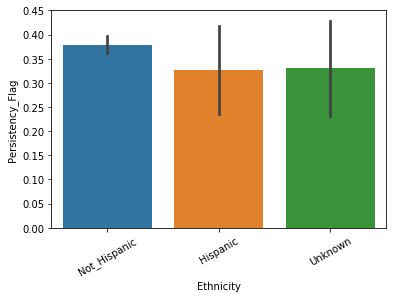

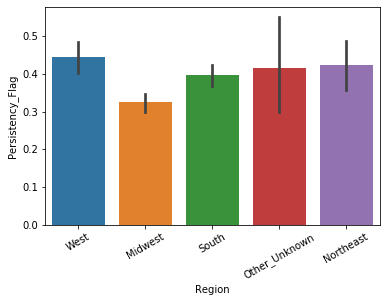

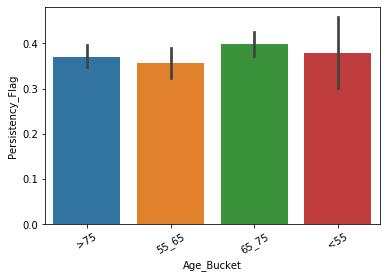

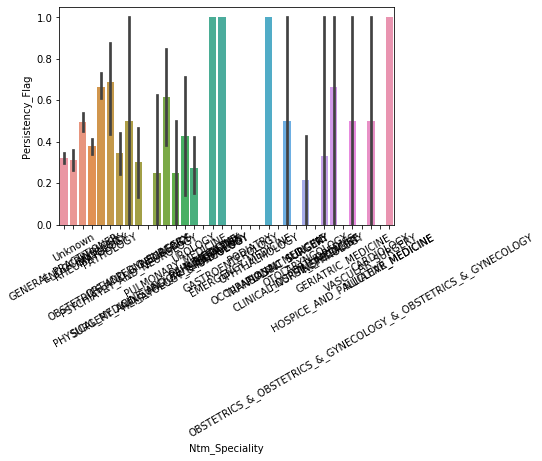

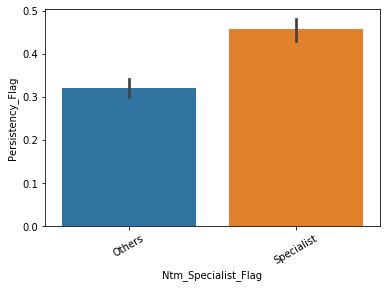

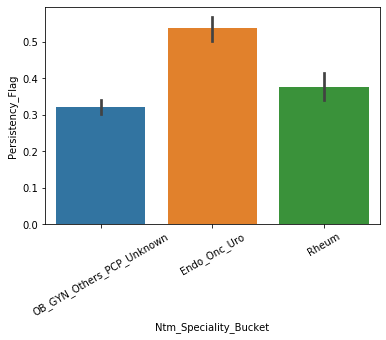

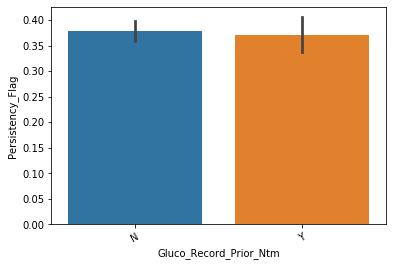

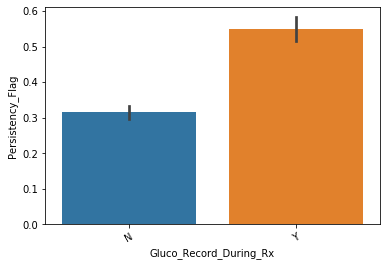

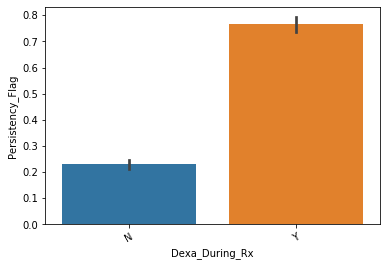

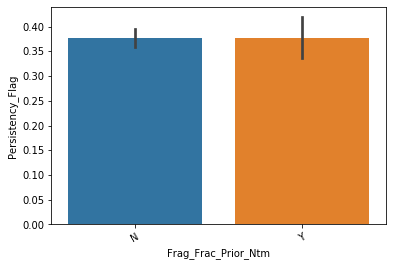

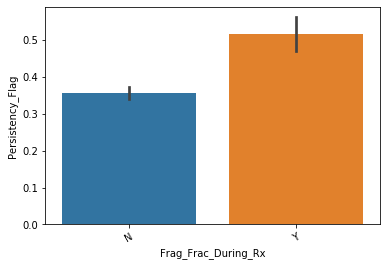

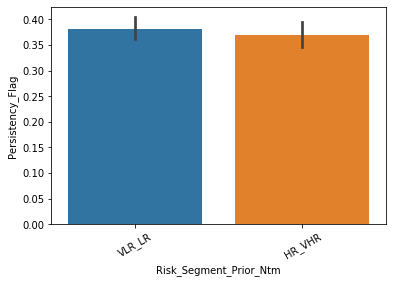

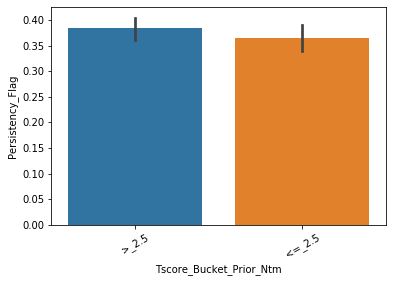

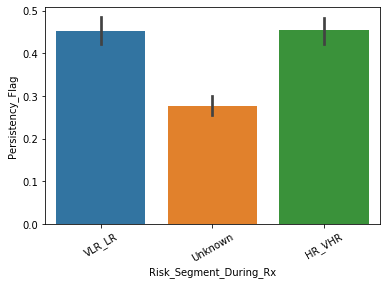

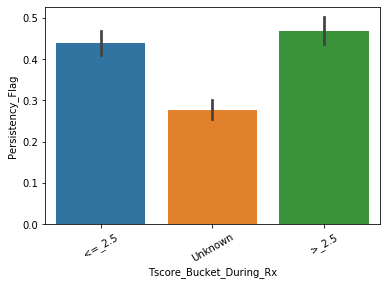

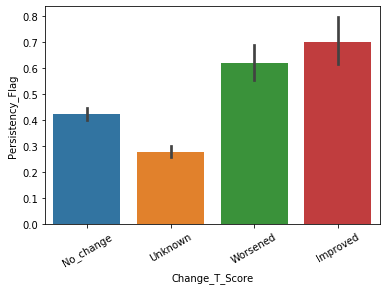

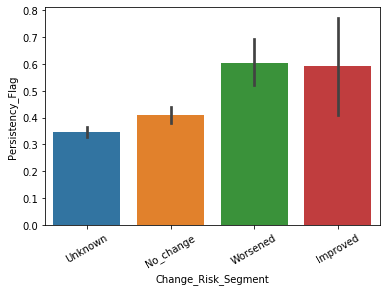

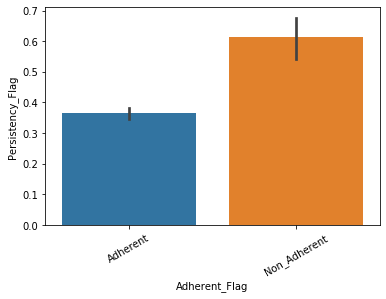

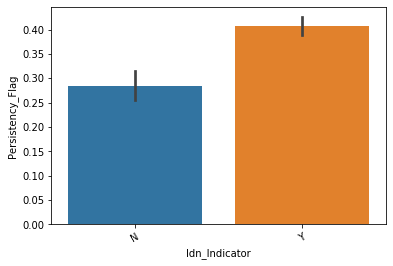

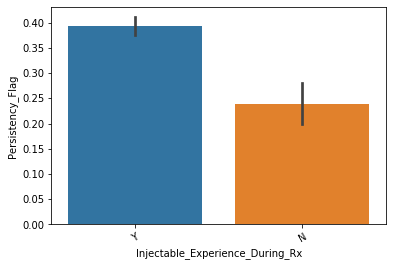

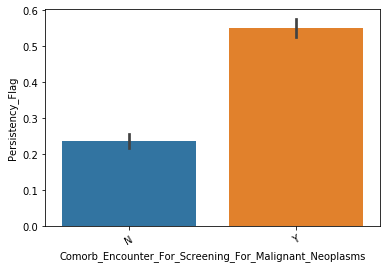

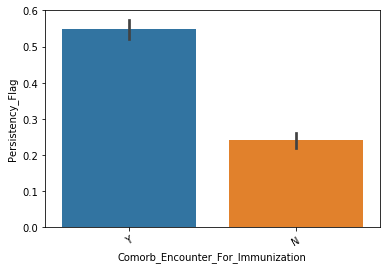

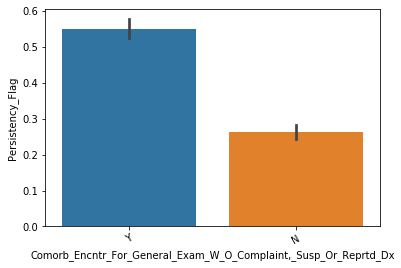

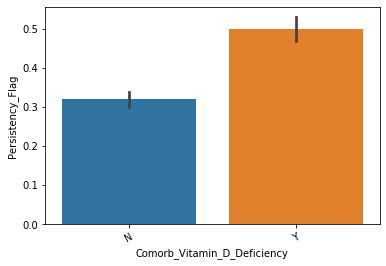

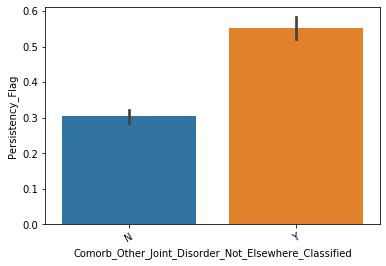

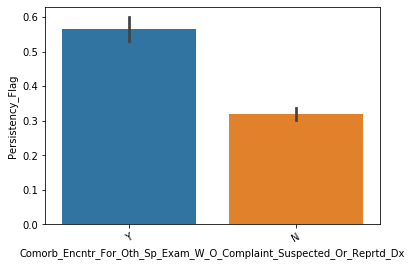

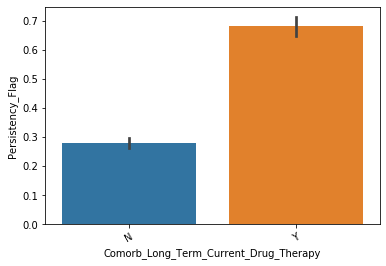

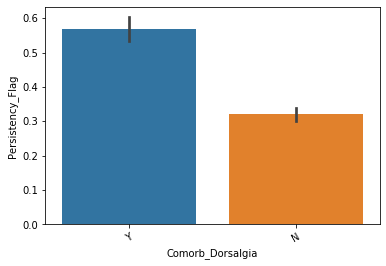

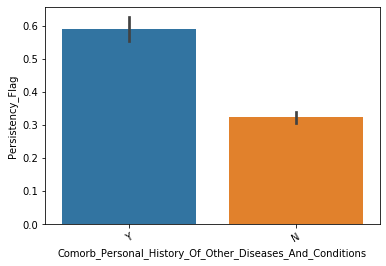

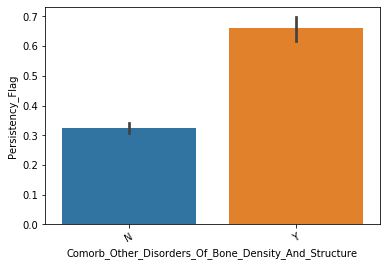

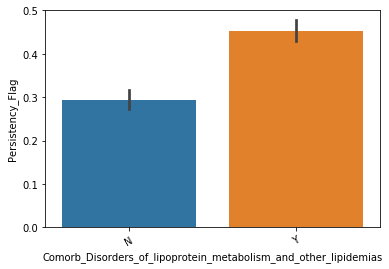

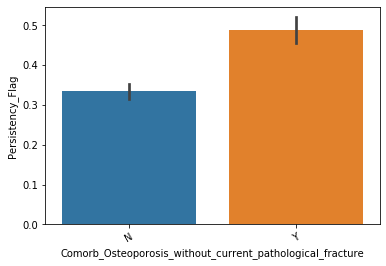

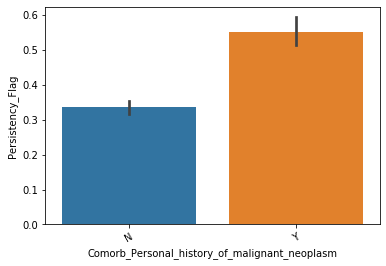

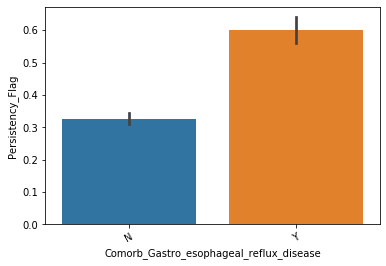

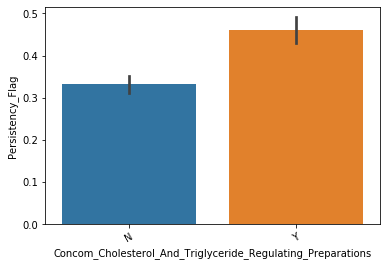

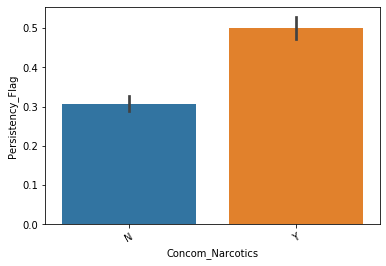

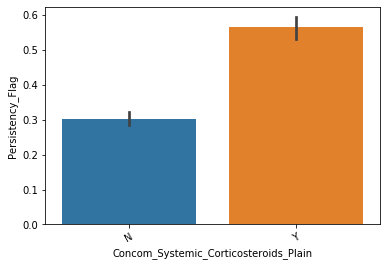

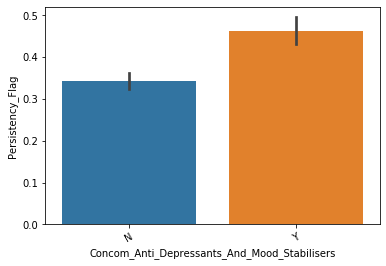

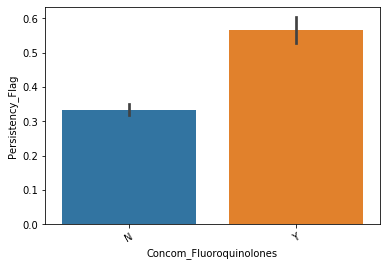

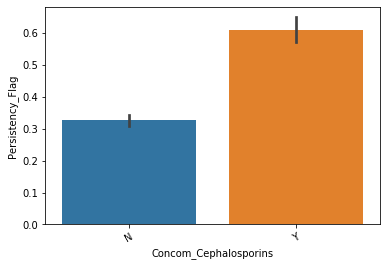

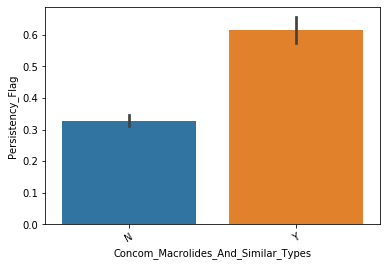

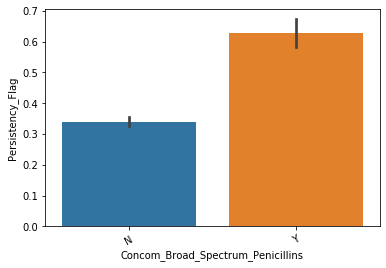

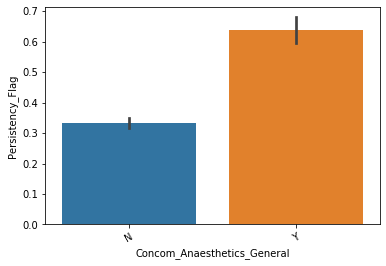

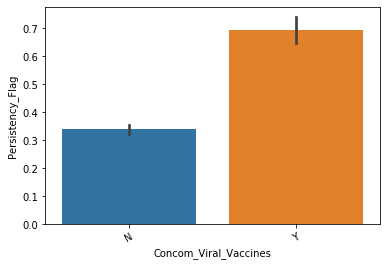

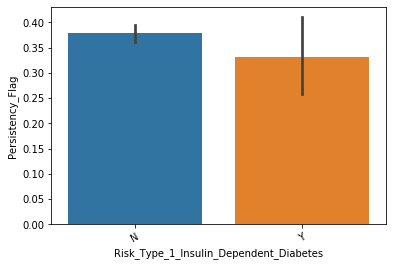

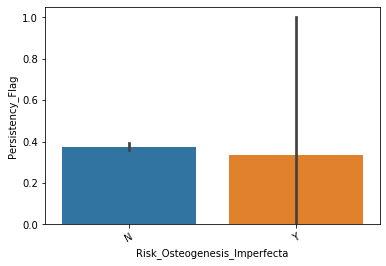

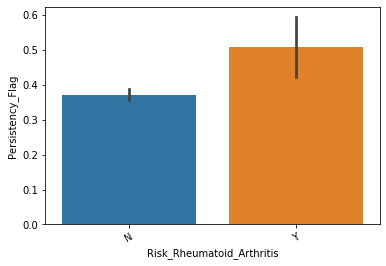

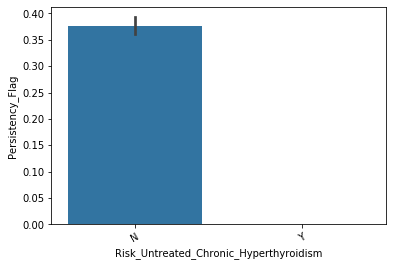

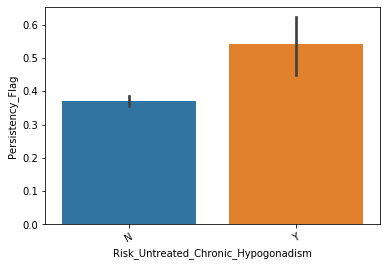

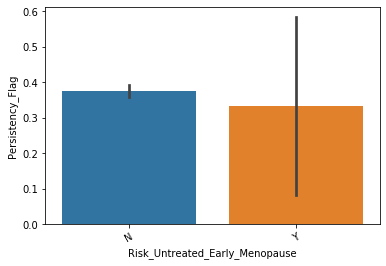

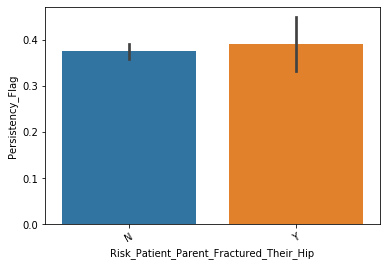

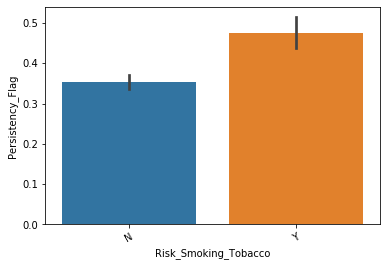

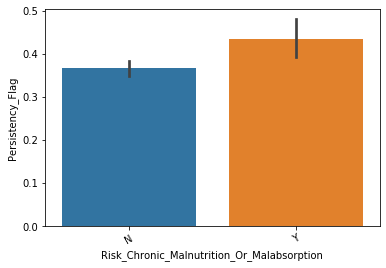

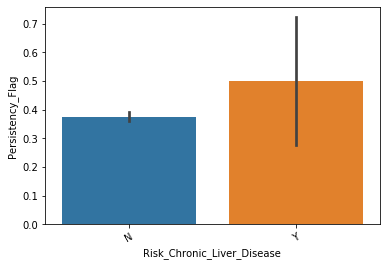

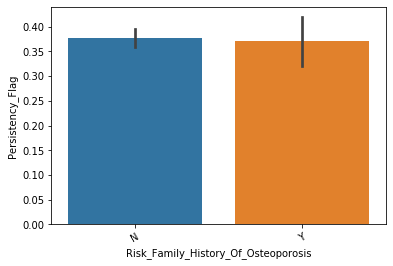

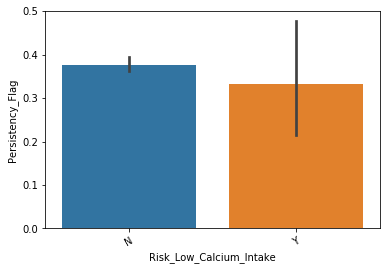

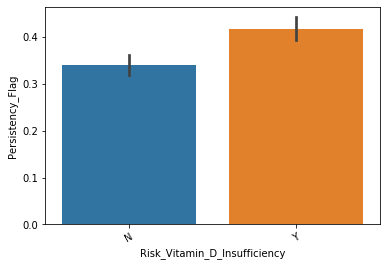

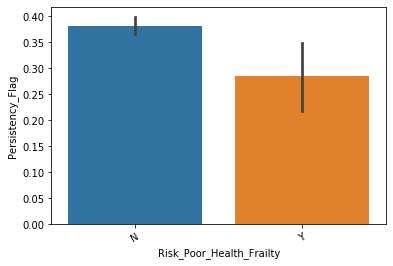

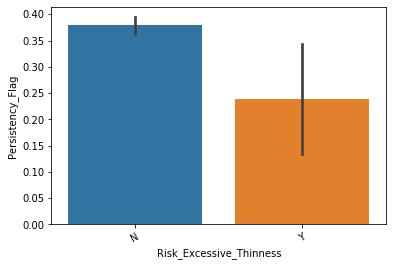

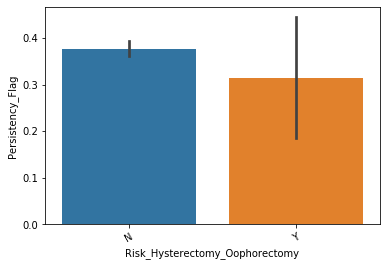

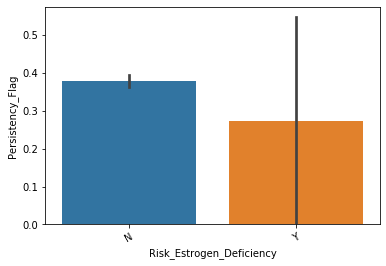

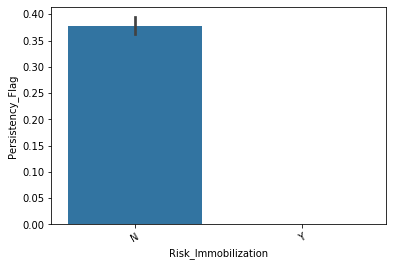

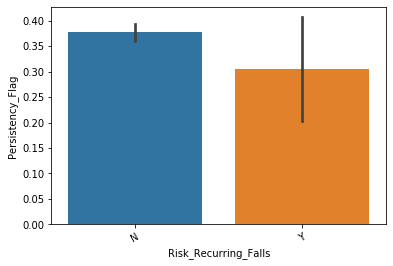

In [9]:
var=[]
for i in df.columns:
    if df[i].dtype=='O' and i!='Ptid':
        var.append(i)

for i in var[2:]:
    ax = sns.barplot(x=i, y='Persistency_Flag', data=df)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    plt.show()

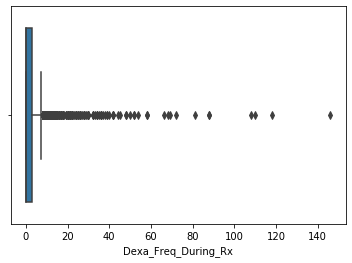

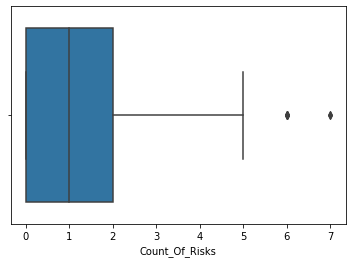

In [10]:
# Plotting the boxplot of the numeric variables 
for i in Num_Var:
    sns.boxplot(x=i, data=df)
    plt.show()

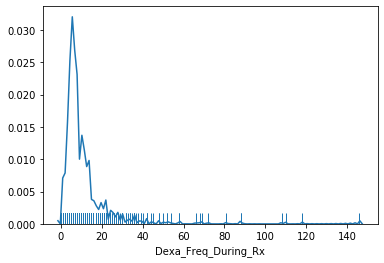

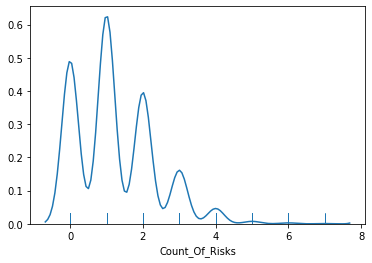

In [11]:
# Plotting the distplot to understand the distribution of the numeric variables 
for i in Num_Var:
    sns.distplot(df[i], hist=False, rug=True)
    plt.show()    

In [12]:
# As most of the features containing few categories same ( eg: unknown, others etc) hence modfying these values.


df['Race'] = [c.replace('Other_Unknown', 'Other_Unknown_Race') for c in df['Race']]

df['Ethnicity'] = [c.replace('Unknown', 'Unknown_Ethnicity') for c in df['Ethnicity']]

df['Region'] = [c.replace('Other_Unknown', 'Other_Unknown_Region') for c in df['Region']]

df['Ntm_Specialist_Flag'] = [c.replace('Others', 'Others_Ntm_Specialist_Flag') for c in df['Ntm_Specialist_Flag']]

df['Ntm_Speciality'] = [c.replace('Unknown', 'Ntm_Speciality_Unknown') for c in df['Ntm_Speciality']]

df['Risk_Segment_During_Rx'] = [c.replace('Unknown', 'Unknown_Risk_Segment_During_Rx') for c in df['Risk_Segment_During_Rx']]

df['Tscore_Bucket_During_Rx'] = [c.replace('Unknown', 'Unknown_Tscore_Bucket_During_Rx') for c in df['Tscore_Bucket_During_Rx']]

df['Change_T_Score'] = [c.replace('Unknown', 'Unknown_Change_T_Score') for c in df['Change_T_Score']]
df['Change_T_Score'] = [c.replace('No_change', 'No_change_Change_T_Score') for c in df['Change_T_Score']]
df['Change_T_Score'] = [c.replace('Worsened', 'Worsened_Change_T_Score') for c in df['Change_T_Score']]
df['Change_T_Score'] = [c.replace('Improved', 'Improved_Change_T_Score') for c in df['Change_T_Score']]

df['Change_Risk_Segment'] = [c.replace('Unknown', 'Unknown_Change_Risk_Segment') for c in df['Change_Risk_Segment']]
df['Change_Risk_Segment'] = [c.replace('No_change', 'No_change_Change_Risk_Segment') for c in df['Change_Risk_Segment']]
df['Change_Risk_Segment'] = [c.replace('Worsened', 'Worsened_Change_Risk_Segment') for c in df['Change_Risk_Segment']]
df['Change_Risk_Segment'] = [c.replace('Improved', 'Improved_Change_Risk_Segment') for c in df['Change_Risk_Segment']]



In [13]:
#Dropping variables which contains less information:
remove_list=['Risk_Osteogenesis_Imperfecta','Risk_Untreated_Chronic_Hyperthyroidism','Risk_Untreated_Early_Menopause','Risk_Chronic_Liver_Disease','Risk_Estrogen_Deficiency','Risk_Immobilization']

df=df.drop(['Risk_Osteogenesis_Imperfecta','Risk_Untreated_Chronic_Hyperthyroidism','Risk_Untreated_Early_Menopause','Risk_Chronic_Liver_Disease','Risk_Estrogen_Deficiency','Risk_Immobilization'],axis=1)

In [14]:
# Assiggning 2 levels categorical variable to 0 and 1 form.

cat_var_2_level = [i for i in df.columns if i not in remove_list] 

#Ignore PTID and Target variable and assign

for i in cat_var_2_level[2:]:
    if len(df[i].value_counts())<=2:
        df[i] = df[i].map({df[i].value_counts().index[0]: 0, df[i].value_counts().index[1]: 1})

In [15]:
df.shape

(3424, 63)

In [16]:
df.describe()

,Persistency_Flag,Gender,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,...,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Recurring_Falls,Count_Of_Risks
count,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,...,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000
mean,0.376460,0.056659,0.412091,0.235105,0.263435,3.016063,0.273364,0.161215,0.121787,0.436040,...,0.188084,0.137266,0.104556,0.012266,0.477804,0.056075,0.019568,0.015771,0.020152,1.239486
std,0.484568,0.231223,0.492283,0.424126,0.440560,8.136545,0.445751,0.367783,0.327088,0.495965,...,0.390836,0.344179,0.306025,0.110088,0.499580,0.230100,0.138530,0.124607,0.140540,1.094914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,146.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


#### For categorical variables with more than 2 levels, creating dummy features (one-hot encoded)


In [17]:
#Identifying categorical variables which have more than 2 levels
cat_var_g_2level = [i for i in df.columns[1:] if len(df[i].value_counts())>2 and df[i].dtypes!='int64']
cat_var_g_2level

['Race',
 'Ethnicity',
 'Region',
 'Age_Bucket',
 'Ntm_Speciality',
 'Ntm_Speciality_Bucket',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment']

In [18]:
#Renaming values of feature age_bucket and Tscore_Bucket_During_Rx

df['Age_Bucket'] = [c.replace('<55', 'Less_than_55') for c in df['Age_Bucket']]
df['Age_Bucket'] = [c.replace('55_65', 'Between_55_and_65') for c in df['Age_Bucket']]
df['Age_Bucket'] = [c.replace('65_75', 'Between_65_and_75') for c in df['Age_Bucket']]
df['Age_Bucket'] = [c.replace('>75', 'Greater_than_75') for c in df['Age_Bucket']]


df['Tscore_Bucket_During_Rx'] = [c.replace('<=_2.5', 'Less_than_equal_2_5') for c in df['Tscore_Bucket_During_Rx']]
df['Tscore_Bucket_During_Rx'] = [c.replace('>_2.5', 'Greater_than_2_5') for c in df['Tscore_Bucket_During_Rx']]

In [19]:
df[cat_var_g_2level].shape

(3424, 10)

In [20]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[cat_var_g_2level], drop_first=True)

# Adding the results to the master dataframe
df1 = pd.concat([df, dummy1], axis=1)

In [21]:
df1.drop(columns=cat_var_g_2level,inplace=True)

In [22]:
df1.shape

(3424, 112)

### NA Values identification and imputation

In [23]:
df1.isnull().sum().sum()

0

In [24]:
df1.describe()

,Persistency_Flag,Gender,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,...,Risk_Segment_During_Rx_Unknown_Risk_Segment_During_Rx,Risk_Segment_During_Rx_VLR_LR,Tscore_Bucket_During_Rx_Less_than_equal_2_5,Tscore_Bucket_During_Rx_Unknown_Tscore_Bucket_During_Rx,Change_T_Score_No_change_Change_T_Score,Change_T_Score_Unknown_Change_T_Score,Change_T_Score_Worsened_Change_T_Score,Change_Risk_Segment_No_change_Change_Risk_Segment,Change_Risk_Segment_Unknown_Change_Risk_Segment,Change_Risk_Segment_Worsened_Change_Risk_Segment
count,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,...,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000
mean,0.376460,0.056659,0.412091,0.235105,0.263435,3.016063,0.273364,0.161215,0.121787,0.436040,...,0.437208,0.280958,0.297021,0.437208,0.484813,0.437208,0.050526,0.307243,0.650993,0.035339
std,0.484568,0.231223,0.492283,0.424126,0.440560,8.136545,0.445751,0.367783,0.327088,0.495965,...,0.496114,0.449533,0.457013,0.496114,0.499842,0.496114,0.219059,0.461418,0.476726,0.184662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,146.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Outlier detection and imputation

In [25]:
df1[Num_Var]

,Dexa_Freq_During_Rx,Count_Of_Risks
0,0,0
1,0,0
2,0,2
3,0,1
4,0,1
...,...,...
3419,0,1
3420,0,0
3421,7,1
3422,0,0


In [26]:
df1['Dexa_Freq_During_Rx'].quantile([0.87,.91,.92,.93,.94,.95,.96,.97,.98,.99,1.0])

0.87      8.00
0.91     10.00
0.92     11.00
0.93     12.00
0.94     13.00
0.95     14.00
0.96     17.00
0.97     20.00
0.98     25.00
0.99     34.77
1.00    146.00
Name: Dexa_Freq_During_Rx, dtype: float64

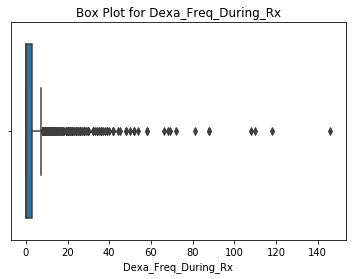

In [27]:
sns.boxplot(x='Dexa_Freq_During_Rx', data=df1).set_title('Box Plot for Dexa_Freq_During_Rx')
plt.show()

In [28]:
#Capping the values which are greater than 86 percentiles to 86 percentile 
df1['Dexa_Freq_During_Rx'][df['Dexa_Freq_During_Rx'] >= 7.0] = 7.0


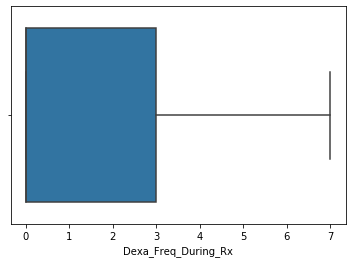

In [29]:
sns.boxplot(x='Dexa_Freq_During_Rx', data=df1)
plt.show()

In [30]:

df1['Count_Of_Risks'].quantile([0.91,.92,.93,.94,.95,.96,.97,.98,.99,1.0])


0.91    3.0
0.92    3.0
0.93    3.0
0.94    3.0
0.95    3.0
0.96    3.0
0.97    4.0
0.98    4.0
0.99    4.0
1.00    7.0
Name: Count_Of_Risks, dtype: float64

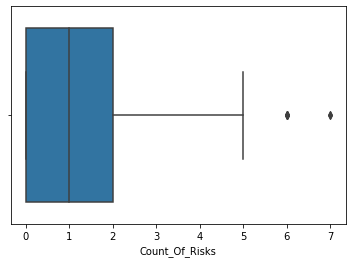

In [31]:
sns.boxplot(x='Count_Of_Risks', data=df1)
plt.show()

In [32]:
#Capping the values which are greater than 99 percentiles to 99 percentile 
df1['Count_Of_Risks'][df['Count_Of_Risks'] >= 4.0] = 4.0

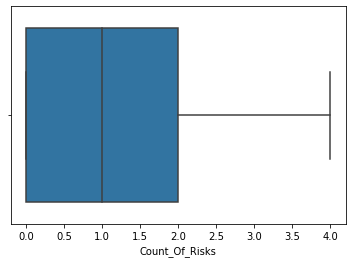

In [33]:
sns.boxplot(x='Count_Of_Risks', data=df1)
plt.show()

In [34]:
Q1 = df1['Dexa_Freq_During_Rx'].quantile(0.25)
Q3 = df1['Dexa_Freq_During_Rx'].quantile(0.75)

In [35]:
IQR = Q3-Q1                    

In [36]:
df1[((df1['Dexa_Freq_During_Rx'] < (Q1 - 1.5 * IQR)) |(df1['Dexa_Freq_During_Rx'] > (Q3 + 1.5 * IQR)))]


,Ptid,Persistency_Flag,Gender,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,...,Risk_Segment_During_Rx_Unknown_Risk_Segment_During_Rx,Risk_Segment_During_Rx_VLR_LR,Tscore_Bucket_During_Rx_Less_than_equal_2_5,Tscore_Bucket_During_Rx_Unknown_Tscore_Bucket_During_Rx,Change_T_Score_No_change_Change_T_Score,Change_T_Score_Unknown_Change_T_Score,Change_T_Score_Worsened_Change_T_Score,Change_Risk_Segment_No_change_Change_Risk_Segment,Change_Risk_Segment_Unknown_Change_Risk_Segment,Change_Risk_Segment_Worsened_Change_Risk_Segment


In [37]:
Q1 = df1['Count_Of_Risks'].quantile(0.25)
Q3 = df1['Count_Of_Risks'].quantile(0.75)
IQR = Q3-Q1
df1[((df1['Count_Of_Risks'] < (Q1 - 1.5 * IQR)) |(df1['Count_Of_Risks'] > (Q3 + 1.5 * IQR)))]

,Ptid,Persistency_Flag,Gender,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,...,Risk_Segment_During_Rx_Unknown_Risk_Segment_During_Rx,Risk_Segment_During_Rx_VLR_LR,Tscore_Bucket_During_Rx_Less_than_equal_2_5,Tscore_Bucket_During_Rx_Unknown_Tscore_Bucket_During_Rx,Change_T_Score_No_change_Change_T_Score,Change_T_Score_Unknown_Change_T_Score,Change_T_Score_Worsened_Change_T_Score,Change_Risk_Segment_No_change_Change_Risk_Segment,Change_Risk_Segment_Unknown_Change_Risk_Segment,Change_Risk_Segment_Worsened_Change_Risk_Segment


### Correlation

In [38]:
# Let's see the correlation matrix 
df1.corr()
#dropping high corr dummy variables
high_cor_dummy_var=['Ntm_Speciality_Bucket_OB_GYN_Others_PCP_Unknown','Ntm_Speciality_GENERAL_PRACTITIONER','Change_T_Score_No_change_Change_T_Score','Ntm_Speciality_Bucket_OB_GYN_Others_PCP_Unknown']


In [39]:
df1=df1.drop(high_cor_dummy_var,axis=1)

df1.shape

(3424, 109)

###  Test-Train Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Putting feature variable to X
X = df1.drop(['Ptid','Persistency_Flag'], axis=1)

X.head()

,Gender,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,...,Ntm_Speciality_Bucket_Rheum,Risk_Segment_During_Rx_Unknown_Risk_Segment_During_Rx,Risk_Segment_During_Rx_VLR_LR,Tscore_Bucket_During_Rx_Less_than_equal_2_5,Tscore_Bucket_During_Rx_Unknown_Tscore_Bucket_During_Rx,Change_T_Score_Unknown_Change_T_Score,Change_T_Score_Worsened_Change_T_Score,Change_Risk_Segment_No_change_Change_Risk_Segment,Change_Risk_Segment_Unknown_Change_Risk_Segment,Change_Risk_Segment_Worsened_Change_Risk_Segment
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0,1,1,...,0,1,0,0,1,1,0,0,1,0


In [42]:
# Putting response variable to Y
Y = df1['Persistency_Flag']

Y.head()

0    1
1    0
2    0
3    0
4    0
Name: Persistency_Flag, dtype: int64

In [43]:
# Splitting the data into train and test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

Scaling numerical variables only as other are already in the range between 0 and 1

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

X_train[Num_Var] = scaler.fit_transform(X_train[Num_Var])

X_train.head()

,Gender,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,...,Ntm_Speciality_Bucket_Rheum,Risk_Segment_During_Rx_Unknown_Risk_Segment_During_Rx,Risk_Segment_During_Rx_VLR_LR,Tscore_Bucket_During_Rx_Less_than_equal_2_5,Tscore_Bucket_During_Rx_Unknown_Tscore_Bucket_During_Rx,Change_T_Score_Unknown_Change_T_Score,Change_T_Score_Worsened_Change_T_Score,Change_Risk_Segment_No_change_Change_Risk_Segment,Change_Risk_Segment_Unknown_Change_Risk_Segment,Change_Risk_Segment_Worsened_Change_Risk_Segment
3377,0,0,0,1,1.583876,1,1,0,0,0,...,0,1,0,0,1,1,0,0,1,0
1380,0,0,0,0,0.862948,1,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
2227,0,1,0,0,1.944340,1,0,1,1,1,...,1,0,0,1,0,0,0,0,0,1
638,0,0,0,0,-0.578909,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2495,0,0,1,1,-0.578909,0,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0


In [46]:
### Checking the Persistency Rate
Persistency_Rate = (sum(df1['Persistency_Flag'])/len(df1['Persistency_Flag'].index))*100
Persistency_Rate

37.646028037383175

### Model Building

Let's start by splitting our data into a training set and a test set.

In [47]:
import statsmodels.api as sm

In [48]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#### Feature Selection

We will start with autmatic feature elimination using RFE and start with 15 variables.
After this step, we will check VIF and Statistics of the variable(p-value) for feature elimination ( backward elimination).


In [49]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, Y_train)

In [50]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Gender', False, 76),
 ('Ntm_Specialist_Flag', False, 46),
 ('Gluco_Record_Prior_Ntm', False, 9),
 ('Gluco_Record_During_Rx', False, 52),
 ('Dexa_Freq_During_Rx', True, 1),
 ('Dexa_During_Rx', False, 59),
 ('Frag_Frac_Prior_Ntm', False, 48),
 ('Frag_Frac_During_Rx', False, 51),
 ('Risk_Segment_Prior_Ntm', False, 65),
 ('Tscore_Bucket_Prior_Ntm', False, 68),
 ('Adherent_Flag', False, 14),
 ('Idn_Indicator', False, 17),
 ('Injectable_Experience_During_Rx', False, 71),
 ('Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', False, 2),
 ('Comorb_Encounter_For_Immunization', False, 20),
 ('Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx', True, 1),
 ('Comorb_Vitamin_D_Deficiency', False, 5),
 ('Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', False, 42),
 ('Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
  False,
  25),
 ('Comorb_Long_Term_Current_Drug_Therapy', True, 1),
 ('Comorb_Dorsalgia', False, 29),
 ('Comorb_Personal_History_Of_Other_D

In [51]:
col = X_train.columns[rfe.support_]

In [52]:
X_train.columns[~rfe.support_]

Index(['Gender', 'Ntm_Specialist_Flag', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Adherent_Flag', 'Idn_Indicator',
       'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization', 'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
       'Comorb_Osteoporosis_without_current_pathological_fracture',
       'Comorb_Personal_history_of_malignant_neoplasm',
       'Comorb_Gastro_esophageal_reflux_disease',
       'C

In [53]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       Persistency_Flag   No. Observations:                 2396
Model:                            GLM   Df Residuals:                     2380
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -998.89
Date:                Sat, 16 May 2020   Deviance:                       1997.8
Time:                        19:33:36   Pearson chi2:                 2.35e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -1.9312      0.100    -19.328      0.000      -2.127      -1.735
Dexa_Freq_During_Rx                                                 1.1161      0.060     18.494      0.000       0.998       1.234
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx     1.0434      0.114      9.120      0.000       0.819       1.268
Comorb_Long_Term_Current_Drug_Therapy                               1.2172      0.134      9.070      0.000       0.954       1.480
Concom_Systemic_Corticosteroids_Plain                               0.8020      0.126      6.386      0.000       0.556       1.048
Concom_Broad_Spectrum_Penicillins                                   0.7619      0.164      4.636      0.000       0.440       1.084
Concom_Viral_Vaccines                                               1.2037      0.182      6.613      0.000       0.847       1.560
Risk_Untreated_Chronic_Hypogonadism                                 0.8621      0.291      2.965      0.003       0.292       1.432
Risk_Poor_Health_Frailty                                           -1.1559      0.289     -3.999      0.000      -1.722      -0.589
Risk_Hysterectomy_Oophorectomy                                     -1.0623      0.540     -1.967      0.049      -2.121      -0.004
Race_Asian                                                          0.9863      0.320      3.083      0.002       0.359       1.613
Ntm_Speciality_ONCOLOGY                                             1.5008      0.236      6.371      0.000       1.039       1.963
Ntm_Speciality_PATHOLOGY                                            2.2842      0.976      2.340      0.019       0.371       4.197
Ntm_Speciality_PULMONARY_MEDICINE                                  -2.7058      1.422     -1.903      0.057      -5.493       0.082
Ntm_Speciality_RADIOLOGY                                           22.0999   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Change_Risk_Segment_Worsened_Change_Risk_Segment                    1.1856      0.284      4.173      0.000       0.629       1.742
===================================================================================================================================
"""

In [54]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Comorb_Long_Term_Current_Drug_Therapy,1.49
3,Concom_Systemic_Corticosteroids_Plain,1.46
1,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_...",1.36
4,Concom_Broad_Spectrum_Penicillins,1.21
5,Concom_Viral_Vaccines,1.20
10,Ntm_Speciality_ONCOLOGY,1.10
0,Dexa_Freq_During_Rx,1.07
7,Risk_Poor_Health_Frailty,1.05
6,Risk_Untreated_Chronic_Hypogonadism,1.04
9,Race_Asian,1.03


#### VIF all variables are in the expected range which suggests multicollinarity in the dataset is not present.

We Will drop Ntm_Speciality_RADIOLOGY feature as it is statistically insignificant 

In [56]:
col = col.drop('Ntm_Speciality_RADIOLOGY', 1)
col

Index(['Dexa_Freq_During_Rx',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy',
       'Concom_Systemic_Corticosteroids_Plain',
       'Concom_Broad_Spectrum_Penicillins', 'Concom_Viral_Vaccines',
       'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Poor_Health_Frailty',
       'Risk_Hysterectomy_Oophorectomy', 'Race_Asian',
       'Ntm_Speciality_ONCOLOGY', 'Ntm_Speciality_PATHOLOGY',
       'Ntm_Speciality_PULMONARY_MEDICINE',
       'Change_Risk_Segment_Worsened_Change_Risk_Segment'],
      dtype='object')

In [57]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       Persistency_Flag   No. Observations:                 2396
Model:                            GLM   Df Residuals:                     2381
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1000.6
Date:                Sat, 16 May 2020   Deviance:                       2001.2
Time:                        19:33:36   Pearson chi2:                 2.35e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -1.9281      0.100    -19.319      0.000      -2.124      -1.732
Dexa_Freq_During_Rx                                                 1.1141      0.060     18.473      0.000       0.996       1.232
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx     1.0490      0.114      9.178      0.000       0.825       1.273
Comorb_Long_Term_Current_Drug_Therapy                               1.2145      0.134      9.054      0.000       0.952       1.477
Concom_Systemic_Corticosteroids_Plain                               0.7987      0.126      6.363      0.000       0.553       1.045
Concom_Broad_Spectrum_Penicillins                                   0.7593      0.164      4.623      0.000       0.437       1.081
Concom_Viral_Vaccines                                               1.2013      0.182      6.602      0.000       0.845       1.558
Risk_Untreated_Chronic_Hypogonadism                                 0.8593      0.291      2.957      0.003       0.290       1.429
Risk_Poor_Health_Frailty                                           -1.1565      0.289     -4.004      0.000      -1.723      -0.590
Risk_Hysterectomy_Oophorectomy                                     -1.0643      0.540     -1.972      0.049      -2.122      -0.007
Race_Asian                                                          0.9802      0.320      3.065      0.002       0.353       1.607
Ntm_Speciality_ONCOLOGY                                             1.4977      0.235      6.360      0.000       1.036       1.959
Ntm_Speciality_PATHOLOGY                                            2.2821      0.976      2.339      0.019       0.370       4.195
Ntm_Speciality_PULMONARY_MEDICINE                                  -2.7029      1.420     -1.904      0.057      -5.486       0.080
Change_Risk_Segment_Worsened_Change_Risk_Segment                    1.1822      0.284      4.163      0.000       0.626       1.739
===================================================================================================================================
"""

In [58]:
# Getting the predicted values on the train set
Y_train_pred = res.predict(X_train_sm)
Y_train_pred[:10]

3377    0.653679
1380    0.698805
2227    0.921957
638     0.070894
2495    0.145008
973     0.050654
3151    0.069888
2670    0.070894
1526    0.363593
2850    0.050654
dtype: float64

In [59]:
Y_train_pred = Y_train_pred.values.reshape(-1)
Y_train_pred[:10]

array([0.65367881, 0.69880471, 0.92195665, 0.07089382, 0.14500831,
       0.05065394, 0.06988777, 0.07089382, 0.36359306, 0.05065394])

In [60]:
Y_train_pred_final = pd.DataFrame({'Persistent':Y_train.values, 'Persistent_Prob':Y_train_pred})
Y_train_pred_final['Ptid'] = Y_train.index
Y_train_pred_final.head()

,Persistent,Persistent_Prob,Ptid
0,1,0.653679,3377
1,1,0.698805,1380
2,1,0.921957,2227
3,0,0.070894,638
4,0,0.145008,2495


In [61]:
# Lets take threshold cutoff probability as 0.5 at this point of time. We will tune this later.
Y_train_pred_final['predicted'] = Y_train_pred_final.Persistent_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
Y_train_pred_final.head()

,Persistent,Persistent_Prob,Ptid,predicted
0,1,0.653679,3377,1
1,1,0.698805,1380,1
2,1,0.921957,2227,1
3,0,0.070894,638,0
4,0,0.145008,2495,0


In [62]:
# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_final.Persistent, Y_train_pred_final.predicted )
print(confusion)

[[1353  158]
 [ 280  605]]


In [63]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(Y_train_pred_final.Persistent,Y_train_pred_final.predicted))

0.8171953255425709


In [64]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Comorb_Long_Term_Current_Drug_Therapy,1.49
3,Concom_Systemic_Corticosteroids_Plain,1.46
1,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_...",1.36
4,Concom_Broad_Spectrum_Penicillins,1.21
5,Concom_Viral_Vaccines,1.20
10,Ntm_Speciality_ONCOLOGY,1.10
0,Dexa_Freq_During_Rx,1.07
7,Risk_Poor_Health_Frailty,1.05
6,Risk_Untreated_Chronic_Hypogonadism,1.04
9,Race_Asian,1.03


In [66]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [67]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6836158192090396

In [68]:
# Let us calculate specificity
TN / float(TN+FP)

0.8954334877564527

In [69]:
# Calculate false postive rate - predicting persistent when Patient is not persistent
print(FP/ float(TN+FP))

0.10456651224354732


In [70]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8285364360073484


In [71]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [72]:
fpr, tpr, thresholds = metrics.roc_curve( Y_train_pred_final.Persistent, Y_train_pred_final.Persistent_Prob, drop_intermediate = False )


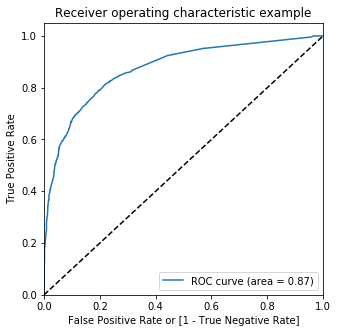

In [73]:
draw_roc(Y_train_pred_final.Persistent, Y_train_pred_final.Persistent_Prob)

In [74]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_final[i]= Y_train_pred_final.Persistent_Prob.map(lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

,Persistent,Persistent_Prob,Ptid,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.653679,3377,1,1,1,1,1,1,1,1,0,0,0
1,1,0.698805,1380,1,1,1,1,1,1,1,1,0,0,0
2,1,0.921957,2227,1,1,1,1,1,1,1,1,1,1,1
3,0,0.070894,638,0,1,0,0,0,0,0,0,0,0,0
4,0,0.145008,2495,0,1,1,0,0,0,0,0,0,0,0


In [75]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final.Persistent, Y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.369366  1.000000  0.000000
0.1   0.1  0.621452  0.951412  0.428193
0.2   0.2  0.753339  0.861017  0.690271
0.3   0.3  0.786728  0.820339  0.767042
0.4   0.4  0.807179  0.742373  0.845136
0.5   0.5  0.817195  0.683616  0.895433
0.6   0.6  0.809265  0.606780  0.927862
0.7   0.7  0.796327  0.535593  0.949040
0.8   0.8  0.765025  0.400000  0.978822
0.9   0.9  0.728715  0.281356  0.990735


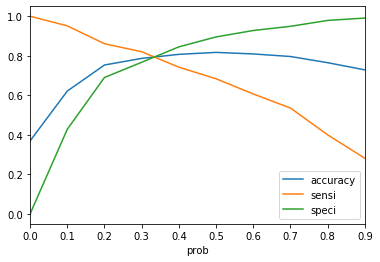

In [76]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [77]:
# Let's consider cutoff proability value as 0.33
Y_train_pred_final['final_predicted'] = Y_train_pred_final.Persistent_Prob.map( lambda x: 1 if x > 0.33 else 0)

Y_train_pred_final.head()

,Persistent,Persistent_Prob,Ptid,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.653679,3377,1,1,1,1,1,1,1,1,0,0,0,1
1,1,0.698805,1380,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.921957,2227,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.070894,638,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.145008,2495,0,1,1,0,0,0,0,0,0,0,0,0


In [78]:
# Let's check the overall accuracy.
metrics.accuracy_score(Y_train_pred_final.Persistent, Y_train_pred_final.final_predicted)

0.7979966611018364

In [79]:
confusion2 = metrics.confusion_matrix(Y_train_pred_final.Persistent, Y_train_pred_final.final_predicted )
confusion2

array([[1212,  299],
       [ 185,  700]])

In [80]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [81]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7909604519774012

In [82]:
# Let us calculate specificity
TN / float(TN+FP)

0.8021178027796162

In [83]:
# Calculate false postive rate - predicting Persistent when patient is not persistent
print(FP/ float(TN+FP)*100)

19.788219722038384


In [84]:
# Positive predictive value 
print (TP / float(TP+FP)*100)

70.07007007007007


In [85]:
# Negative predictive value
print (TN / float(TN+ FN)*100)

86.75733715103794


In [86]:
Y_train_pred_final

,Persistent,Persistent_Prob,Ptid,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.653679,3377,1,1,1,1,1,1,1,1,0,0,0,1
1,1,0.698805,1380,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.921957,2227,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.070894,638,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.145008,2495,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,0,0.145008,1930,0,1,1,0,0,0,0,0,0,0,0,0
2392,0,0.070894,79,0,1,0,0,0,0,0,0,0,0,0,0
2393,0,0.178863,1859,0,1,1,0,0,0,0,0,0,0,0,0
2394,1,0.889607,2840,1,1,1,1,1,1,1,1,1,1,0,1


##### Precision
$\frac{TP}{TP + FP}$


In [87]:
Precision = confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])
Precision

0.7007007007007007

##### Recall
$\frac{TP}{TP + FN}$


In [88]:
Recall = confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])
Recall

0.7909604519774012

##### F1 Score

$ F1 = \frac{2(Precision*Recall)}{Precision+Recall}$


In [89]:

F1_Score = 2*(Precision * Recall)/(Precision+Recall)
F1_Score

0.743099787685775

### Precision and Recall trade-off

In [90]:
from sklearn.metrics import precision_recall_curve

In [91]:
Y_train_pred_final.Persistent, Y_train_pred_final.final_predicted

(0       1
 1       1
 2       1
 3       0
 4       0
        ..
 2391    0
 2392    0
 2393    0
 2394    1
 2395    0
 Name: Persistent, Length: 2396, dtype: int64, 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 2391    0
 2392    0
 2393    0
 2394    1
 2395    1
 Name: final_predicted, Length: 2396, dtype: int64)

In [92]:
p, r, thresholds = precision_recall_curve(Y_train_pred_final.Persistent, Y_train_pred_final.Persistent_Prob)

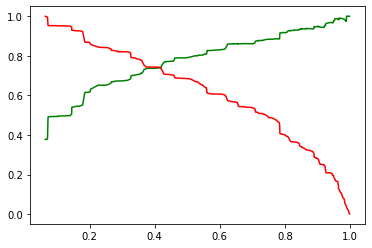

In [93]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [94]:
X_test[Num_Var] = scaler.transform(X_test[Num_Var])

In [95]:
X_test = X_test[col]
X_test.head()

,Dexa_Freq_During_Rx,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Long_Term_Current_Drug_Therapy,Concom_Systemic_Corticosteroids_Plain,Concom_Broad_Spectrum_Penicillins,Concom_Viral_Vaccines,Risk_Untreated_Chronic_Hypogonadism,Risk_Poor_Health_Frailty,Risk_Hysterectomy_Oophorectomy,Race_Asian,Ntm_Speciality_ONCOLOGY,Ntm_Speciality_PATHOLOGY,Ntm_Speciality_PULMONARY_MEDICINE,Change_Risk_Segment_Worsened_Change_Risk_Segment
798,-0.578909,1,0,0,0,0,0,0,0,0,1,0,0,0
1399,0.862948,0,0,1,0,0,0,0,0,0,0,0,0,0
490,-0.578909,1,0,0,0,0,0,0,0,0,0,0,0,0
1355,-0.578909,0,0,0,0,0,0,0,0,0,0,0,0,0
2390,1.944340,0,1,1,0,1,0,0,0,0,1,0,0,0


In [96]:
X_test_sm = sm.add_constant(X_test)

In [97]:
Y_test_pred = res.predict(X_test_sm)

In [98]:
Y_test_pred[:10]

798     0.493404
1399    0.458115
490     0.178863
1355    0.070894
2390    0.992968
1006    0.783651
2381    0.850151
785     0.975976
68      0.618665
3079    0.178863
dtype: float64

In [99]:
# Converting y_pred to a dataframe which is an array
Y_pred_1 = pd.DataFrame(Y_test_pred)

In [100]:
# Let's see the head
Y_pred_1.head()

,0
798,0.493404
1399,0.458115
490,0.178863
1355,0.070894
2390,0.992968


In [101]:
# Converting Y_test to dataframe
Y_test_df = pd.DataFrame(Y_test)

In [102]:
# Putting Ptid to index
Y_test_df['Ptid'] = Y_test_df.index

In [103]:
# Removing index for both dataframes to append them side by side 
Y_pred_1.reset_index(drop=True, inplace=True)
Y_test_df.reset_index(drop=True, inplace=True)

In [104]:
# Appending Y_test_df and Y_pred_1
Y_pred_final = pd.concat([Y_test_df, Y_pred_1],axis=1)

In [105]:
Y_pred_final.head()

,Persistency_Flag,Ptid,0
0,1,798,0.493404
1,1,1399,0.458115
2,0,490,0.178863
3,1,1355,0.070894
4,1,2390,0.992968


In [106]:
# Renaming the column 
Y_pred_final= Y_pred_final.rename(columns={ 0 : 'Persistent_prob'})

In [107]:
# Rearranging the columns
Y_pred_final = Y_pred_final.reindex(['Ptid','Persistency_Flag','Persistent_prob'], axis=1)

In [108]:
Y_pred_final.head()

,Ptid,Persistency_Flag,Persistent_prob
0,798,1,0.493404
1,1399,1,0.458115
2,490,0,0.178863
3,1355,1,0.070894
4,2390,1,0.992968


In [109]:
Y_pred_final['final_predicted'] = Y_pred_final.Persistent_prob.map(lambda x: 1 if x > 0.33 else 0)

In [110]:
Y_pred_final.head()

,Ptid,Persistency_Flag,Persistent_prob,final_predicted
0,798,1,0.493404,1
1,1399,1,0.458115,1
2,490,0,0.178863,0
3,1355,1,0.070894,0
4,2390,1,0.992968,1


In [111]:
# Let's check the overall accuracy.
metrics.accuracy_score(Y_pred_final.Persistency_Flag, Y_pred_final.final_predicted)

0.7821011673151751

In [112]:
confusion2 = metrics.confusion_matrix(Y_pred_final.Persistency_Flag, Y_pred_final.final_predicted )
confusion2

array([[503, 121],
       [103, 301]])

In [113]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [114]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.745049504950495

In [115]:
# Let us calculate specificity
TN / float(TN+FP)

0.8060897435897436

##### Precision

$ \frac{TP}{TP + FP}$

In [116]:
Precision=confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])
Precision

0.7132701421800948

##### Recall

$\frac{TP}{TP + FN}$

In [117]:
Recall = confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])
Recall

0.745049504950495

##### F1 Score

$ F1 = \frac{2(Precision*Recall)}{Precision+Recall}$





In [118]:
F1_Score=2*(Precision * Recall)/(Precision+Recall)
F1_Score

0.7288135593220338

#### Random Forest

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix
depths = [3,4,5,6,7,8,9,10,11]

In [120]:
num_cv_splits = 5
kf = KFold(n_splits=num_cv_splits, random_state=5)
for depth in depths:
    auc = 0.0
    acc = 0.0
    for train_index, test_index in kf.split(X_train[col]):
        X_train_cv, X_test_cv = X_train[col].iloc[train_index], X_train[col].iloc[test_index]
        Y_train_cv, Y_test_cv = Y_train.iloc[train_index], Y_train.iloc[test_index]
        clf = DecisionTreeClassifier(max_depth=depth, random_state=5)
        clf.fit(X_train_cv,Y_train_cv)
        acc += clf.score(X_test_cv,Y_test_cv)
        pred = clf.predict_proba(X_test_cv)[:,1]
        auc += roc_auc_score(y_true = Y_test_cv, y_score = pred)
    print('depth =', depth, '; mean accuracy =', acc/num_cv_splits, '; auc =', auc/num_cv_splits)

depth = 3 ; mean accuracy = 0.7917397355601948 ; auc = 0.8334750143112835
depth = 4 ; mean accuracy = 0.7959159707724426 ; auc = 0.8379683380364579
depth = 5 ; mean accuracy = 0.7892362560890744 ; auc = 0.8369611486817717
depth = 6 ; mean accuracy = 0.787563500347947 ; auc = 0.8406027911607848
depth = 7 ; mean accuracy = 0.7833959638135003 ; auc = 0.836075680105554
depth = 8 ; mean accuracy = 0.7833942240779401 ; auc = 0.8337803986288774
depth = 9 ; mean accuracy = 0.7813065414057063 ; auc = 0.820101058729394
depth = 10 ; mean accuracy = 0.7792171189979124 ; auc = 0.8197475620948792
depth = 11 ; mean accuracy = 0.7792188587334725 ; auc = 0.8184015236895877


In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
num_trees = [25,50,75,100,125,150,175,200,225,250]
max_depth = [3,4,5,6]
num_cv_splits = 5

In [122]:
kf = KFold(n_splits=num_cv_splits, random_state=5)
for tree in num_trees:
    for depth in max_depth:
        auc = 0.0
        acc = 0.0
        for train_index, test_index in kf.split(X_train[col]):
            X_train_cv, X_test_cv = X_train[col].iloc[train_index], X_train[col].iloc[test_index]
            Y_train_cv, Y_test_cv = Y_train.iloc[train_index], Y_train.iloc[test_index]
            clf = RandomForestClassifier(n_estimators=tree, max_depth=depth, n_jobs = 8, random_state=5)
            clf.fit(X_train_cv,Y_train_cv)
            acc += clf.score(X_test_cv,Y_test_cv)
            pred = clf.predict_proba(X_test_cv)[:,1]
            auc += roc_auc_score(y_true = Y_test_cv, y_score = pred)
        print('num_trees =',tree,'; depth=',depth,'; mean accuracy =',acc/num_cv_splits,'; auc =',auc/num_cv_splits)

num_trees = 25 ; depth= 3 ; mean accuracy = 0.8009272790535839 ; auc = 0.8655446721215195
num_trees = 25 ; depth= 4 ; mean accuracy = 0.802178148921364 ; auc = 0.8672416070543518
num_trees = 25 ; depth= 5 ; mean accuracy = 0.8034281489213638 ; auc = 0.8676028739121445
num_trees = 25 ; depth= 6 ; mean accuracy = 0.7950782881002088 ; auc = 0.8660228231012563
num_trees = 50 ; depth= 3 ; mean accuracy = 0.8009272790535839 ; auc = 0.8665528727399494
num_trees = 50 ; depth= 4 ; mean accuracy = 0.8055158315935979 ; auc = 0.868263753130908
num_trees = 50 ; depth= 5 ; mean accuracy = 0.8080201809324983 ; auc = 0.8690357020936824
num_trees = 50 ; depth= 6 ; mean accuracy = 0.7984159707724425 ; auc = 0.8666575985640158
num_trees = 75 ; depth= 3 ; mean accuracy = 0.8030097425191371 ; auc = 0.865728701256596
num_trees = 75 ; depth= 4 ; mean accuracy = 0.8059307585247042 ; auc = 0.8674859008426488
num_trees = 75 ; depth= 5 ; mean accuracy = 0.806767571329158 ; auc = 0.8682318035314488
num_trees = 75

In [123]:
# Final model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
num_trees = 250
max_depth = 5
clf = RandomForestClassifier(n_estimators=num_trees, max_depth=max_depth, n_jobs = 4, random_state=5)
clf.fit(X_train[col],Y_train)
pred_score = clf.predict_proba(X_test)
pred = clf.predict(X_test)
auc = roc_auc_score(y_true = Y_test, y_score = pred_score[:,1])
print('num_trees =',num_trees,'; depth=',max_depth,'; auc =',auc)


num_trees = 250 ; depth= 5 ; auc = 0.8536252062706271


In [124]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       624
           1       0.80      0.62      0.70       404

    accuracy                           0.79      1028
   macro avg       0.79      0.76      0.77      1028
weighted avg       0.79      0.79      0.78      1028



In [125]:
confusion=confusion_matrix(Y_test,pred)

In [126]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [127]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6163366336633663

In [128]:
# Let us calculate specificity
TN / float(TN+FP)

0.8990384615384616

##### Precision

$ \frac{TP}{TP + FP}$


In [129]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7980769230769231

##### Recall

$ \frac{TP}{TP + FN}$


In [130]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6163366336633663

**Logistic Regression is performing better and hence we have choosen Logistic Regression as our final model.**